In [1]:
import pandas as pd
import glob 

/tmp/ipykernel_3288415/401530445.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_i = pd.read_csv('../datasets/sequences/AF25003_AF25004.csv')

In [3]:
len(set(df_i.sequence))

127

In [4]:
fs = glob.glob("./pipeline_out/*/dataframe/*")
fs

['./pipeline_out/nep2/dataframe/df_unique.json',
 './pipeline_out/pepsin/dataframe/df_unique.json']

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



./pipeline_out/nep2/dataframe/df_unique.json


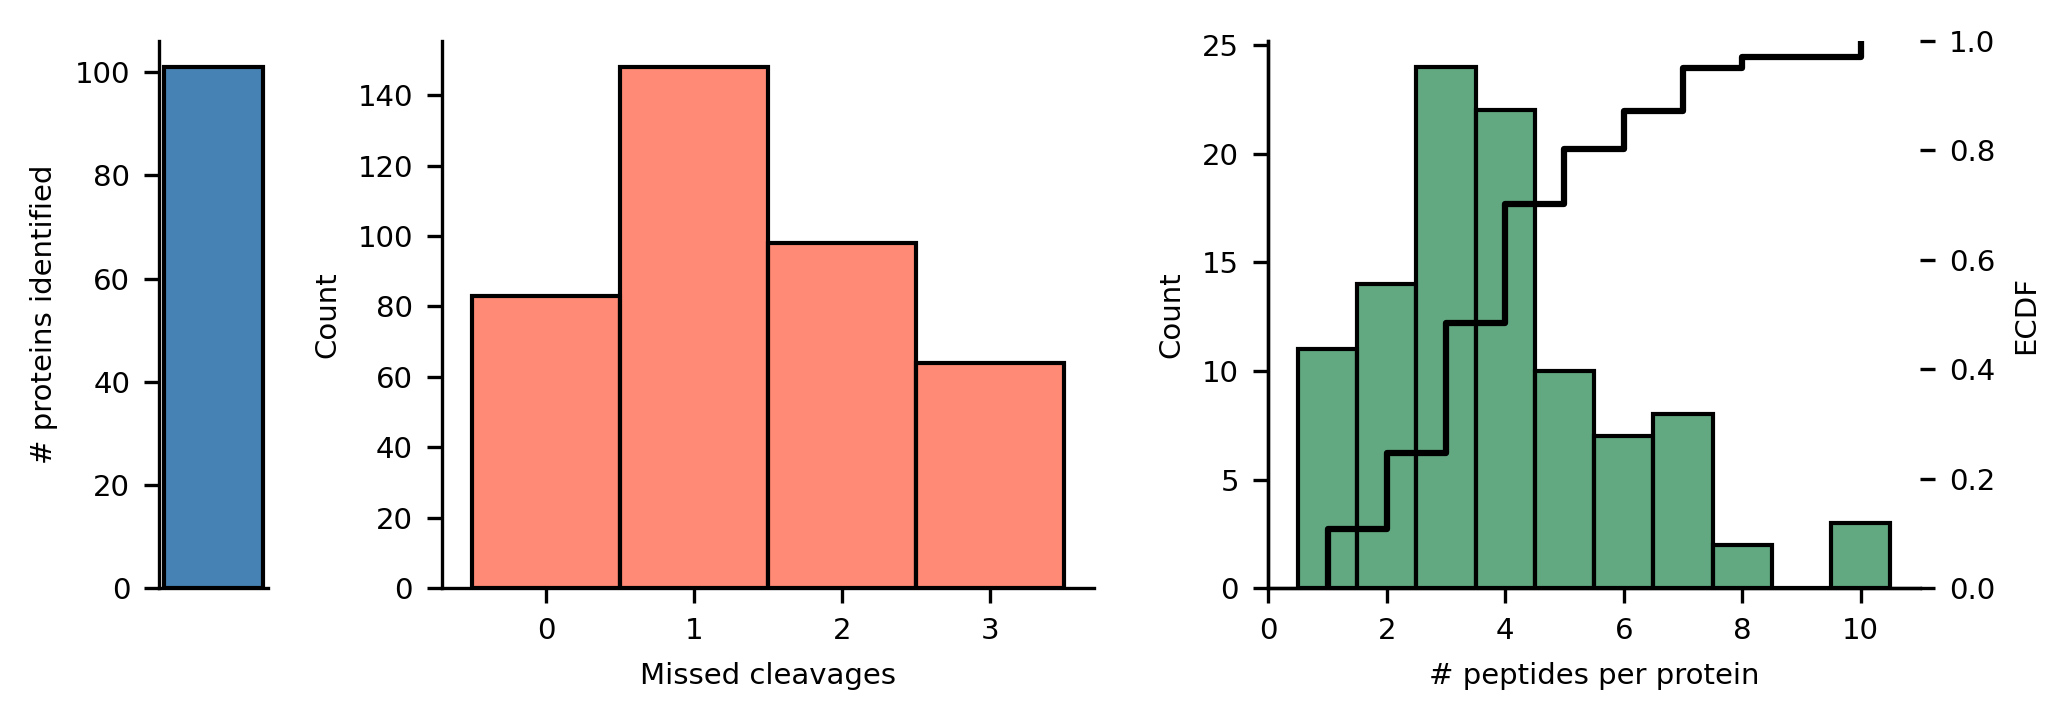

./pipeline_out/pepsin/dataframe/df_unique.json


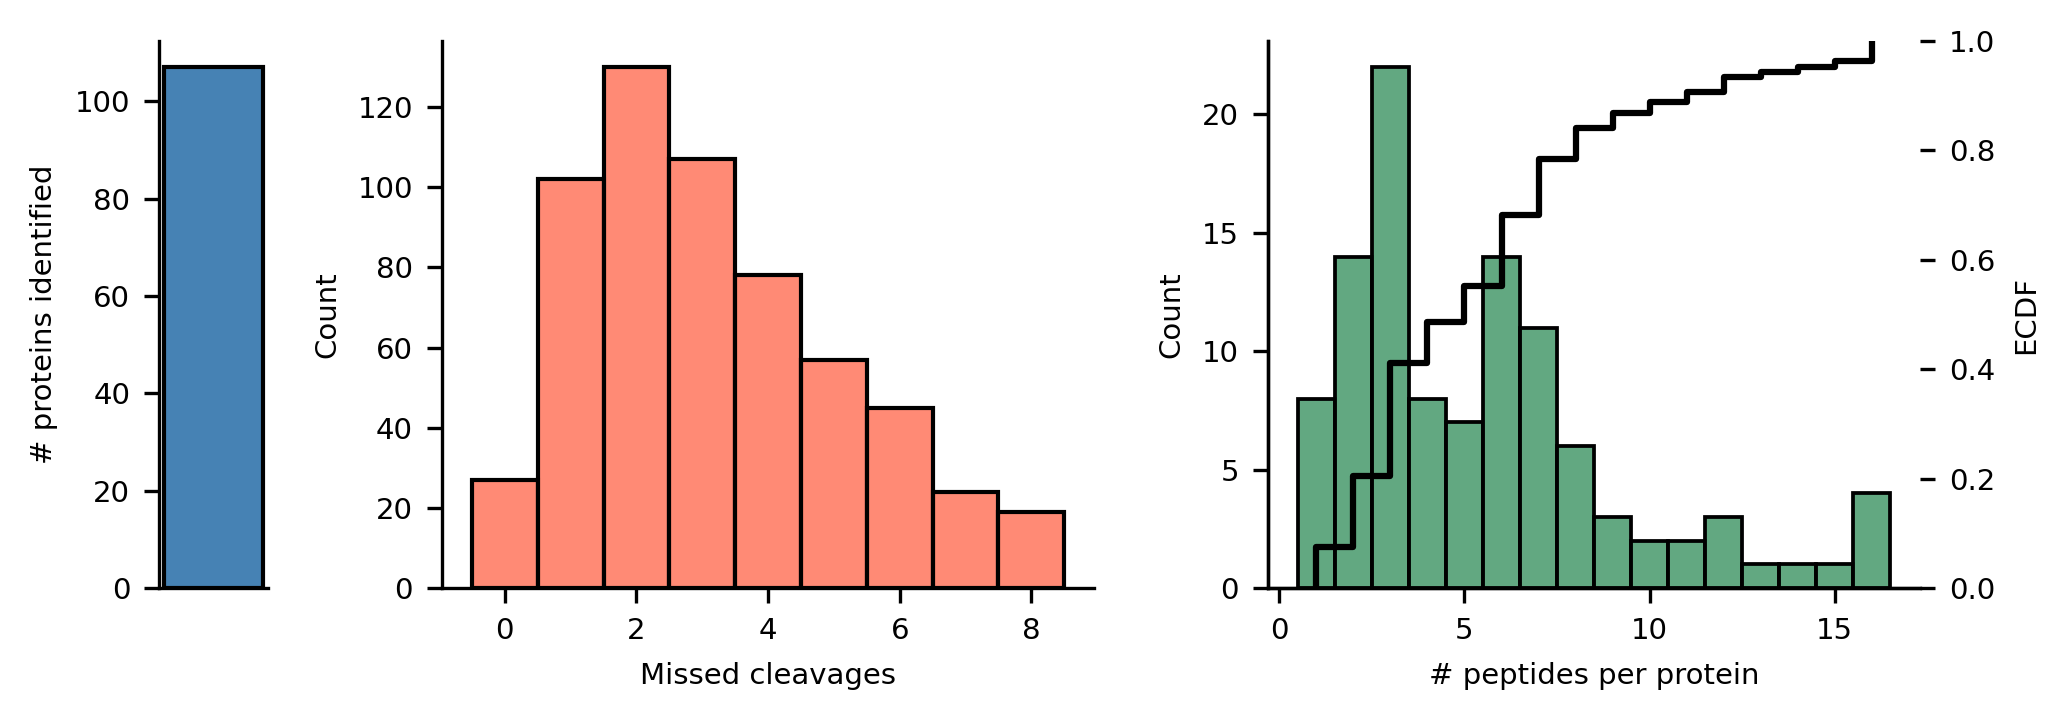

In [6]:
# Assume df_unique already loaded from df_unique.json
# e.g., df_unique = pd.read_json("dataframe/df_unique.json")

for f in fs:
    
    print(f)
    
    df_unique = pd.read_json(f)

    # filter observed
    df_obs = df_unique.query("observed == 1").copy()

    # proteins identified (>=1 observed peptide)
    n_proteins_identified = df_obs["name"].nunique()

    # peptides per protein
    pep_counts = df_obs.groupby("name")["peptide"].nunique()

    # ---------------- PLOTTING ----------------
    fig, axes = plt.subplots(1, 3, figsize=(7, 2.5), dpi=300, width_ratios=[0.5, 3, 3])

    # 1) narrow barplot: number of proteins identified
    axes[0].bar([0], [n_proteins_identified], color="steelblue", edgecolor="black")
    axes[0].set_xticks([])
    axes[0].set_ylabel("# proteins identified", fontsize=7)

    # 2) histogram of n_missed_cleavages
    sns.histplot(df_obs["n_missed_clavages"], bins=range(df_obs["n_missed_clavages"].max()+2),
                 discrete=True, color="tomato", edgecolor="black", ax=axes[1])
    axes[1].set_xlabel("Missed cleavages", fontsize=7)
    axes[1].set_ylabel("Count", fontsize=7)

    # 3) histogram of peptides per protein + ECDF on 2nd axis
    ax3 = axes[2]
    sns.histplot(pep_counts, bins=20, color="seagreen", edgecolor="black", ax=ax3, discrete=True)
    ax3.set_xlabel("# peptides per protein", fontsize=7)
    ax3.set_ylabel("Count", fontsize=7)

    ax3b = ax3.twinx()
    sns.ecdfplot(pep_counts, color="black", ax=ax3b)
    ax3b.set_ylabel("ECDF", fontsize=7)

    # clean style: remove top/right spines everywhere
    for ax in [axes[0], axes[1], ax3, ax3b]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.tick_params(labelsize=7)

    plt.tight_layout()
    plt.show()

In [15]:
df_unique.query('observed == 1').groupby('name').size().sort_values()

name
HHH_rd4_0032.pdb_GS         1
HHH_rd3_0218                1
A0A0D2VF83.1_224-253        1
EEHEE_rd4_0183.pdb_GS       1
EHEE_rd2_0061               1
                           ..
HEEH_rd2_0383.pdb_GS       15
HEEH_TK_rd5_0453.pdb_GG    16
EHEE_rd2_1162.pdb_G        16
HHH_rd4_0639               16
HHH_rd4_0048.pdb_S         16
Length: 107, dtype: int64

In [10]:
len(set(df_unique.name))

127

In [11]:
df_unique.query('observed == 1').

SyntaxError: invalid syntax (932794082.py, line 1)